<a href="https://colab.research.google.com/github/reza-rahim/GCP-training/blob/master/01_Gradient_Descent_regression_np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
#x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
#y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
#x,y

In [ ]:
#x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
x = np.arange(0,8,1) # Produces [0, 8) with steps of 1. Same as above

## Create ground truth with gausian noise
#y_grnd = -0.5*x + 2 + np.random.normal(0,.3,len(x))
y_orig=np.array([ 2.02208539,  2.17241624,  0.5481849 ,  0.93764427,  0.23985227,
        -0.23072425, -1.28880395, -1.64549269])

##
y_pred=-0.5*x + 2

x,y_orig,y_pred

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 2.02208539,  2.17241624,  0.5481849 ,  0.93764427,  0.23985227,
        -0.23072425, -1.28880395, -1.64549269]),
 array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5]))

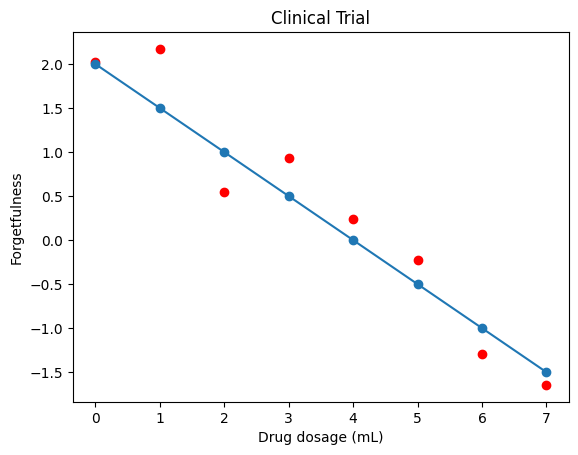

In [ ]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y_orig, color='red')
plt.plot(x,y_pred, marker = 'o')

In [ ]:
m=0
b=0
y_pred=m*x + b




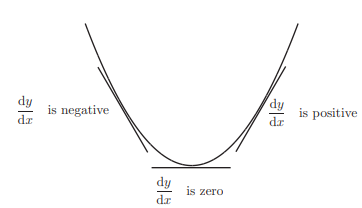


Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship betw

\\[y_p = y\ predicted\\]
\\[y_o = y\ original\\]  

$$ y_p = mx + c  $$


There is a `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by:


$$C = \frac{1}{n} \sum_{i=1}^n (y_p-y_o)^2 $$

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to (w.r.t.) m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  


$$Since \ \  y_p=(mx_i + c)\ let's\ rewrite\ the\ Cost\ function $$

$$C = \frac{1}{n} \sum_{i=1}^n ((mx_i + c)-y_o)^2 $$

$$ \ (Apply\ Power\ Rule\ and\ Chain\ Rule) $$
\\[ \frac{\partial C}{\partial m}  = \frac{1}{n} \sum_{i=0}^n 2((mx_i + c) - y_i )(x_i) \\]

\\[ D_m\ or\ \frac{\partial C}{\partial m}  = \frac{2}{n} \sum_{i=0}^n x_i(y_p - \ y_o) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c\ or \  \frac{\partial C}{\partial c}  = \frac{2}{n} \sum_{i=0}^n (y_p - \ y_o) \\]
3. Now we update the current value of **m** and **c** using the following equation:
\\[ m = m - L \times D_m\\]
\\[ c = c - L \times D_c\\]


In [ ]:
def mse(y_pred, y_orig):
    sigma = sum((y_pred - y_orig)**2)
    return sigma/len(y_orig)

In [ ]:
C=mse(y_pred, y_orig)
C

0.11448243862320125

20.152505421157535
0.5979045739324622
0.26655889877720185
0.1623161946868063
0.12952101379004072
0.11920351579882475
0.11595758874832802
0.11493640682746734
0.11461513882012468
0.11451406659153006
-0.5463638335991837 2.254658602181029


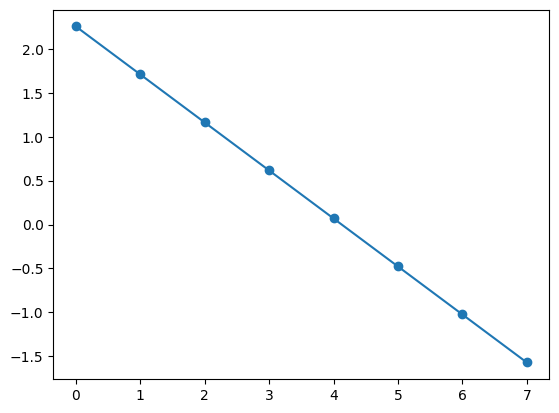

In [ ]:
# Building the model
m = .90
c = .20
n=len(x)
L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

# Performing Gradient Descent
for i in range(epochs):
    y_pred = m*x + c  # The current predicted value of Y
    D_m = (2/n) * sum(x * (y_pred - y_orig ))  # Derivative wrt m
    D_c = (2/n) * sum(y_pred - y_orig  )  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if (i % 100 == 0):
      print(mse(y_pred, y_orig))

print (m, c)
plt.plot(x,y_pred, marker = 'o')

In [ ]:
y_pred

array([ 2.25461817,  1.70826256,  1.16190694,  0.61555133,  0.06919572,
       -0.47715989, -1.0235155 , -1.56987111])

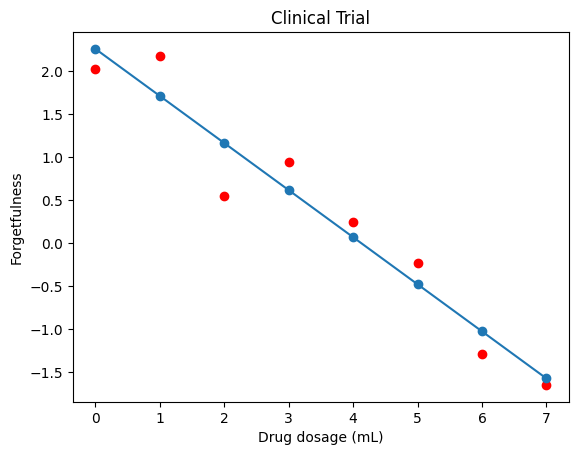

In [ ]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y_orig, color='red')
#plt.plot(x,y, marker = 'o')
plt.plot(x,y_pred, marker = 'o')